In [1]:
from tensorflow.keras.models import load_model
from src.PreProcess import get_data_generators
from src.config import CT_DATA_PATH, IMG_SIZE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2025-08-04 18:18:47.797943: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


load model and validation data

In [7]:
model = load_model("models/ct_model")
_, val_gen = get_data_generators(CT_DATA_PATH, augment=False)

## ' _, ' is a short hand for - throw away the first variable and only give the second which in this case we do not need train_gen

Found 3695 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


generating predictions

In [3]:
y_true = val_gen.classes
y_prob = model.predict(val_gen)
y_pred = (y_prob > 0.5).astype(int).flatten()

31/31 [==============================] - 25s 757ms/step


In [4]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.86      0.84      0.85       460
       Tumor       0.85      0.86      0.85       463

    accuracy                           0.85       923
   macro avg       0.85      0.85      0.85       923
weighted avg       0.85      0.85      0.85       923



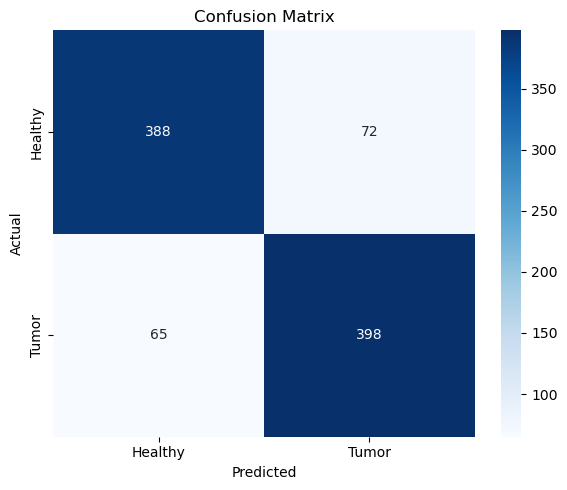

In [5]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

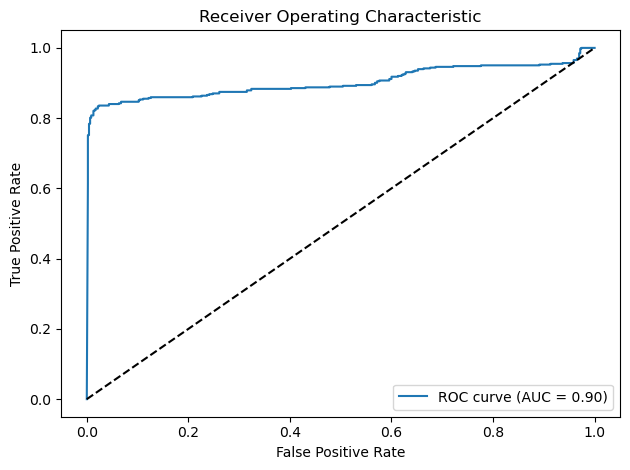

In [6]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
